# Milestone 2 - ANALISIS SENTIMEN MEDIA ASING TERHADAP KEJADIAN INDONESIA PADA TAHUN 2018

In [1]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'news'
# database = 'classicmodels'

# Create Connection to Database
engine = create_engine('mysql+pymysql://'+username+':'+password+'@'+host+':'+port+'/'+database)
# '''engine = create_engine('mysql+pymysql://root: @localhost:3306/academic')'''

def run(sql):
    df = pd.read_sql_query(sql, engine)
    return df

In [2]:
# SQL query to look for keyword in SOURCEURL
data_indonesia = run("""
SELECT 
    * 
FROM 
    gdelt_gkg
WHERE
    SourceURLs LIKE '%%indonesia%%' OR
    SourceURLs LIKE '%%java%%' OR
    SourceURLs LIKE '%%bali%%' OR    
    SourceURLs LIKE '%%lombok%%' OR  
    SourceURLs LIKE '%%palu%%' OR     
    SourceURLs LIKE '%%jokowi%%' OR    
    SourceURLs LIKE '%%widodo%%' OR        
    SourceURLs LIKE '%%jakarta%%'
    """)

## Eksplorasi dengan Materi Statistik yang telah diajarkan pada minggu terkait
Usulan Materi Statistik:
- Statistik Deskriptif Umum (Min, Max, Mean, Mode) dari Tone/AvgTone
- Grafik bulanan
- Korelasi dan klasifikasi antara tema dan sumber beritanya
- Korelasi dan klasifikasi antara tema dan persons
- Korelasi dan klasifikasi antara Themes dan EventCodes

In [27]:
sample = data_indonesia.sample(10)
# sample.to_csv('sample.csv', index=False)
sample

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
47908,20180701,1,None,ENV_OIL;TAX_FNCACT;TAX_FNCACT_MINISTER;ECON_OI...,"4#Rokan, Indonesia (General), Indonesia#ID#ID0...",ignasius jonan,chevron;chevron corp;reuters;indonesia energy,"-3.6036036036036,0.900900900900901,4.504504504...",768552789,reuters.com,https://in.reuters.com/article/gas-conference-...,-3.603604
74301,20180924,1,None,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,"4#Osaka, Osaka, Japan#JA#JA32#34.6667#135.5#-2...",fajar firdaus;abhliash tomy,None,"-0.340136054421769,3.06122448979592,3.40136054...","789367974,789367997,789368655,789368656,789368657",sbs.com.au,https://www.sbs.com.au/news/indonesian-teen-su...,-0.340136
4455,20180119,1,None,CORRUPTION;TAX_FNCACT;TAX_FNCACT_CHAIRMAN;EPU_...,"4#Bersih, Yogyakarta, Indonesia#ID#ID10#-7.904...",ruper murdoch;donald trump;george soros;clare ...,transparency international;jalan tun razak emb...,"-8.27740492170022,2.01342281879195,10.29082774...",723599193,malaysia-chronicle.com,http://www.malaysia-chronicle.com/mahathirs-90...,-8.277405
81385,20181002,1,KILL#2000##1#Indonesia#ID#ID#-5#120#ID;KILL#20...,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,"4#Mutiara, Aceh, Indonesia#ID#ID01#2.9791#99.6...",antara foto;jan gelfand;agus haryono;al jufri,international federation of red cross;hotel ro...,"-5.85106382978723,1.86170212765957,7.712765957...",None,prothomalo.com,https://en.prothomalo.com/international/news/1...,-5.851064
13045,20180220,1,None,NATURAL_DISASTER;NATURAL_DISASTER_VOLCANIC;CRI...,"1#Indonesia#ID#ID#-5#120#ID;4#Lhokseumawe, Ace...",mount sinabung;kamil syahbana,indonesia center;associated press,"-5.78512396694215,0.413223140495868,6.19834710...",None,nydailynews.com,http://www.nydailynews.com/newswires/news/worl...,-5.785124
23706,20180406,1,None,TAX_ECON_PRICE;TAX_FNCACT;TAX_FNCACT_FOUNDER;G...,"1#Indonesia#ID#ID#-5#120#ID;4#Menteng, Jakarta...",None,heart of the city cordela norwood hotel,"4.26829268292683,5.79268292682927,1.5243902439...",None,nowjakarta.co.id,http://nowjakarta.co.id/sixth-on-rooftop-respi...,4.268293
83091,20181003,1,None,EDUCATION;,"4#Makassar, (Id20), Indonesia#ID#ID20#-5.14#11...",rania azzahra rudy;yudi lesmana,indonesia memory sports council,"0.490196078431372,1.47058823529412,0.980392156...",None,thejakartapost.com,http://www.thejakartapost.com/news/2018/10/03/...,0.490196
3003,20180115,1,None,None,1#Indonesia#ID#ID#-5#120#ID;1#Canada#CA#CA#60#...,matt lauer;chris christie;katie couric;mark wa...,sears canada;youtube;jakarta stock exchange;prada,"-4.69973890339426,1.30548302872063,6.005221932...",None,news1130.com,http://www.news1130.com/2018/01/14/structure-i...,-4.699739
48369,20180702,2,"KILL#10#burials#4#Yogyakarta, Yogyakarta, Indo...",LGBT;DISCRIMINATION;DISCRIMINATION_LGBT;DISCRI...,"1#Indonesia#ID#ID#-5#120#ID;4#Yogyakarta, Yogy...",laura nevendorff;ignatius praptoraharjo;atma j...,research center at atma jaya catholic universi...,"-5.36779324055666,1.68986083499006,7.057654075...","768737079,768737090,768737313,768737315,768737...",mynorthwest.com;ktar.com,http://mynorthwest.com/1037866/research-warns-...,-5.367793
73032,20180917,1,None,RELIGION;WB_678_DIGITAL_GOVERNMENT;WB_694_BROA...,"4#Moscow, Moskva, Russia#RS#RS48#55.7522#37.61...",m wahid supriyadi;philip k widjaja;azyumardi a...,civic center;cultural affairs enjay diana;indo...,"2.7190332326284,3.92749244712991,1.20845921450...","787515901,787515902,787515903,787516154",antaranews.com,https://en.antaranews.com/news/118617/indonesi...,2.719033


In [3]:
print("Shape of data GKG :", data_indonesia.shape)

Shape of data GKG : (96295, 11)


In [4]:
# Total Data each month
import matplotlib.pyplot as plt

months = data_indonesia.Date.apply(str).str[0:6]

# plot data each months
data_indonesia.groupby(months).size()

Date
201801     7746
201802     7641
201803     6932
201804     7757
201805    10317
201806     7429
201807     8354
201808    13428
201809     9309
201810    17382
dtype: int64

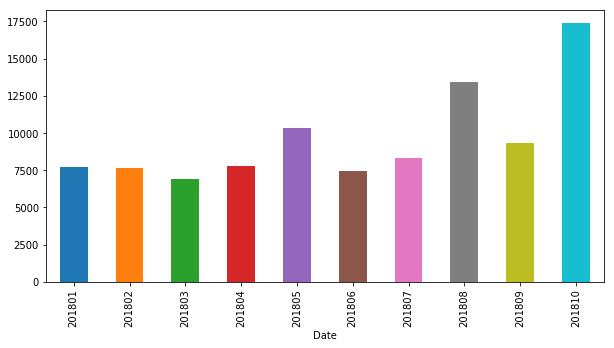

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
data_indonesia.groupby(months).size().plot(kind='bar')

In [111]:
# Total data each day
dataharian = data_indonesia.groupby('Date').size()
# dataharian.to_csv('harian.csv')
dataharian

Date
20180101     185
20180102     221
20180103     200
20180104     274
20180105     285
20180106     119
20180107     100
20180108     134
20180109     239
20180110     207
20180111     235
20180112     239
20180113     129
20180114      68
20180115     745
20180116     350
20180117     278
20180118     234
20180119     235
20180120     126
20180121     119
20180122     245
20180123     433
20180124     432
20180125     300
20180126     317
20180127     207
20180128     176
20180129     351
20180130     271
            ... 
20181002    1654
20181003    1329
20181004     945
20181005     769
20181006     539
20181007     665
20181008     631
20181009     571
20181010     486
20181011     764
20181012     481
20181013     348
20181014     221
20181015     268
20181016     326
20181017     236
20181018     281
20181019     215
20181020     127
20181021     112
20181022     276
20181023     241
20181024     250
20181025     207
20181026     240
20181027     115
20181028     147
20181029 

In [9]:
dataharian[dataharian == 1815]

Date
20181029    1815
dtype: int64

In [125]:
data_indonesia.groupby('Date').size().min()

62

In [10]:
data_indonesia.groupby('Date').size().max()

1815

In [11]:
data_indonesia.groupby('Date').size().mean()

316.75986842105266

In [12]:
data_indonesia.groupby('Date').size().describe()

count     304.000000
mean      316.759868
std       264.913545
min        62.000000
25%       182.000000
50%       251.500000
75%       347.250000
max      1815.000000
dtype: float64

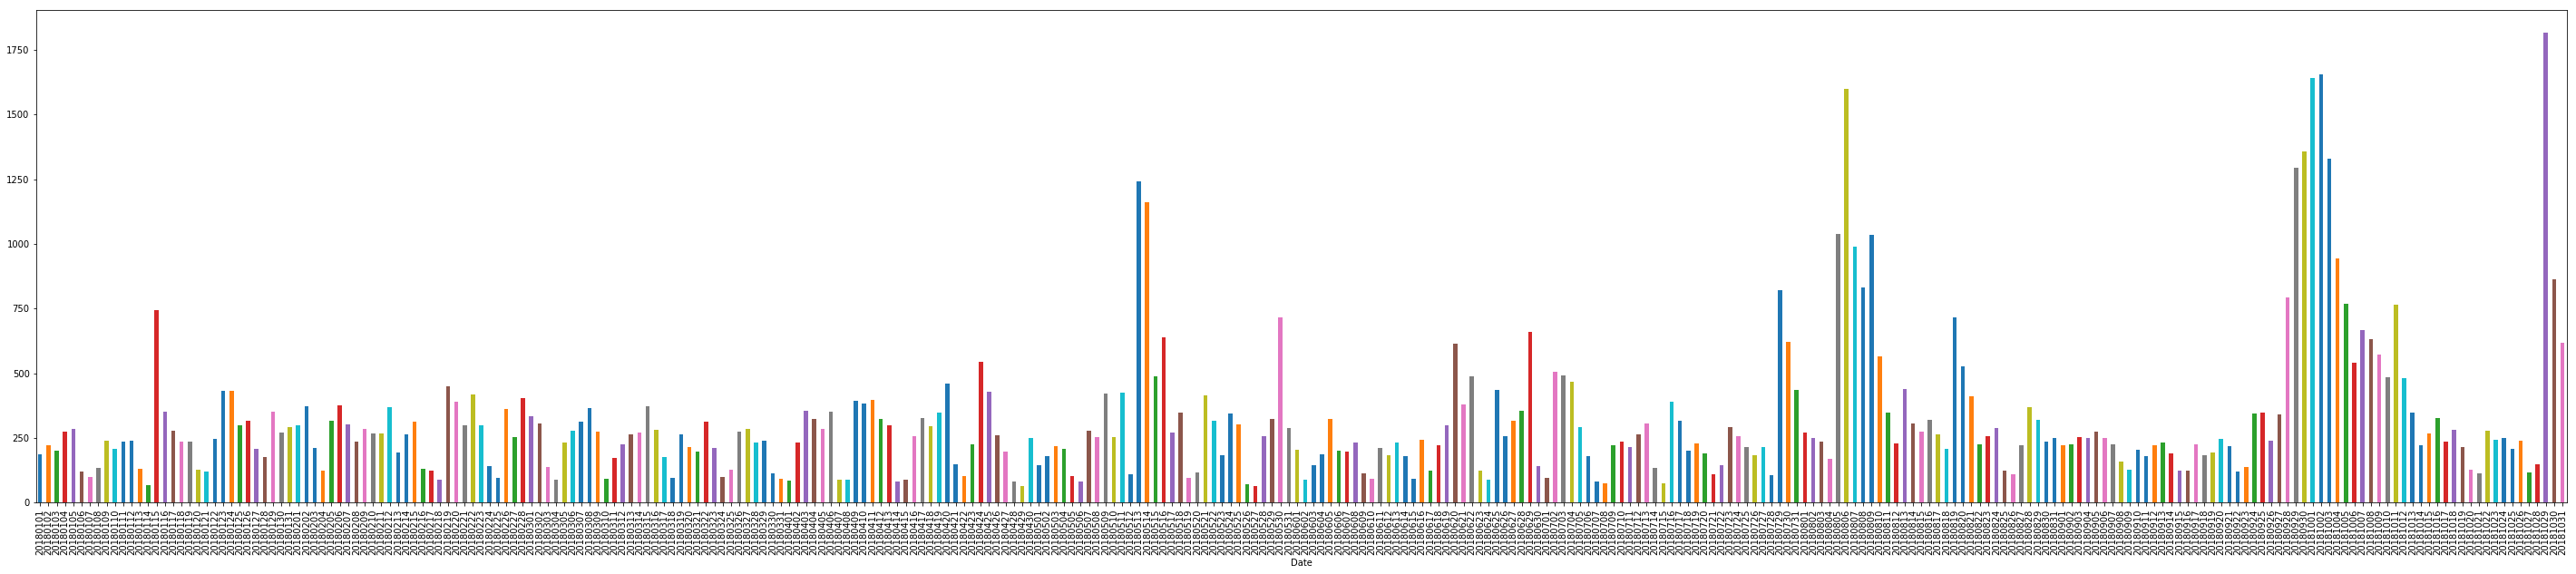

In [13]:
# Total data each day

fig, ax = plt.subplots(figsize=(50,10))

# plot data each day
data_indonesia.groupby('Date').size().plot.bar()

In [14]:
new = data_indonesia["ToneData"].str.split(",", n = -1, expand = True) 
new

,0,1,2,3,4,5
0,6.51340996168582,7.66283524904215,1.14942528735632,8.81226053639847,18.7739463601533,0
1,0.315457413249211,1.89274447949527,1.57728706624606,3.47003154574132,19.5583596214511,0
2,-2.04918032786885,1.63934426229508,3.68852459016393,5.32786885245902,20.0819672131148,0
3,-2.9940119760479,2.09580838323353,5.08982035928144,7.18562874251497,28.1437125748503,0
4,-0.107152424323601,2.69890168765068,2.80605411197428,5.50495579962497,19.8165014733458,1.6340744709349
5,1.86915887850467,2.80373831775701,0.934579439252336,3.73831775700935,15.4205607476636,0
6,-2.7027027027027,1.8018018018018,4.5045045045045,6.30630630630631,26.1261261261261,0.900900900900901
7,-3.52941176470588,3.52941176470588,7.05882352941176,10.5882352941176,29.4117647058824,0
8,-3.47826086956522,2.60869565217391,6.08695652173913,8.69565217391304,26.9565217391304,0
9,-4.02298850574713,2.29885057471264,6.32183908045977,8.62068965517241,27.0114942528736,0


In [15]:
data_indonesia["Tone"] = new[0]
data_indonesia["Tone"] = pd.to_numeric(data_indonesia["Tone"])
data_indonesia.sample(100)

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
62258,20180809,1,SEIZE#250000000#yacht#1#Malaysia#MY#MY#2.5#112...,USPEC_UNCERTAINTY1;ECON_TAXATION;USPEC_POLICY1...,1#Malaysia#MY#MY#2.5#112.5#MY;1#Indonesia#ID#I...,rosmah mansor,us department of justice;barisan nasional,"-5.29801324503311,1.32450331125828,6.622516556...","778219187,778219188",jakartaglobe.id,http://jakartaglobe.id/se-asia/malaysia-repeal...,-5.298013
21858,20180328,1,None,ECON_STOCKMARKET;TAX_ETHNICITY;TAX_ETHNICITY_A...,"4#Mandiri, Jawa Tengah, Indonesia#ID#ID07#-7.4...",astra agro lestari;tiga pilar sejahtera;mark z...,bank danamon indonesia;bank pan indonesia;bank...,"-3.28282828282828,1.01010101010101,4.292929292...",None,businessinsider.com,http://markets.businessinsider.com/news/stocks...,-3.282828
27915,20180421,1,AFFECT#76#Rohingya Muslims stranded#1#Indonesi...,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,1#Australia#AS#AS#-25#135#AS;1#Malaysia#MY#MY#...,rohingya muslim;riza yulianto,international organization for migration;assoc...,"-3.18302387267904,1.3262599469496,4.5092838196...","749536235,749536345,749536346,749536349,749536...",thepublicopinion.com,http://www.thepublicopinion.com/news/associate...,-3.183024
59327,20180806,1,"AFFECT#200#tourists#4#Mataram, Nusa Tenggara B...",AFFECT;EVACUATION;TOURISM;TAX_FNCACT;TAX_FNCAC...,"4#Gili Trawangan, Indonesia (General), Indones...",denink ayu;indian ocean;sutopo purwo nugroho;n...,singapore home affairs;facebook;cnn,"-7.00636942675159,1.52866242038217,8.535031847...","777257993,777263342,777254714,777253480,777251...",forimmediaterelease.net,https://forimmediaterelease.net/indonesia-evac...,-7.006369
78475,20180930,1,None,AFFECT;CRISISLEX_T09_DISPLACEDRELOCATEDEVACUAT...,"4#Donggala, Gorontalo, Indonesia#ID#ID34#0.559...",ruslan sangadji;arie djukifli,a national search;agency basarnas;hotel roa ro...,"-2.6634382566586,0.968523002421308,3.631961259...",None,thejakartapost.com,http://www.thejakartapost.com/news/2018/09/30/...,-2.663438
69446,20180831,5,None,TAX_ETHNICITY;TAX_ETHNICITY_AUSTRALIAN;EDUCATI...,"1#Australia#AS#AS#-25#135#AS;4#Bogor, Jawa Bar...",jusuf kalla;scott morrison;sofyan wanandi;joko...,strategic partnership;indonesia australia comp...,"2.98769771528998,4.04217926186292,1.0544815465...","783409783,783409784,783409785,783409786,783409...",smh.com.au;watoday.com.au;theage.com.au;brisba...,https://www.smh.com.au/world/asia/indonesian-f...,2.987698
12596,20180219,1,None,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,"1#Indonesia#ID#ID#-5#120#ID;4#Borneo, Indonesi...",mount sinabung,None,"-2.4390243902439,0,2.4390243902439,2.439024390...","732157321,732157322",borneobulletin.com.bn,https://borneobulletin.com.bn/indonesias-sinab...,-2.439024
93670,20181029,1,None,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,"4#Pangkal, Jawa Timur, Indonesia#ID#ID08#-7.99...",bhavye suneja;sindu rahayu;edward sirait;joko ...,boeing;ahlcon public school;new york times;lio...,"-2.10526315789474,1.35338345864662,3.458646616...","798210904,798241336,798254219,798285421,798293...",spotlightnepal.com,https://www.spotlightnepal.com/2018/10/29/indo...,-2.105263
92216,20181024,1,None,USPEC_POLICY1;EPU_ECONOMY;EPU_ECONOMY_HISTORIC...,"4#Jakarta, Jakarta Raya, Indonesia#ID#ID04#-6....",triawan munaf,creative economy agency bekraf,"3.2258064516129,3.76344086021505,0.53763440860...",797057947,thejakartapost.com,http://www.thejakartapost.com/news/2018/10/24/...,3.225806
19906,20180319,1,None,TAX_FNCACT;TAX_FNCACT_CHIEF;TAX_FNCACT_EXECUTI...,1#Australia#AS#AS#-25#135#AS;1#Japan#JA#JA#36#...,jason rabinowitz airlineflyer;alan joyce;asia ...,centre for aviation;boeing;us federal aviation...,"1.38483965014577,2.11370262390671,0.7288629737...","739904677,739904678,739904679,739904680,739904...",australianaviation.com.au,http://australianaviation.com.au/2018/03/jetst...,1.384840


In [109]:
data_indonesia['Tone'].describe()

count    96295.000000
mean        -2.529173
std          4.175095
min        -27.272727
25%         -5.416667
50%         -2.590674
75%          0.510204
max         21.428571
Name: Tone, dtype: float64

In [110]:
data_indonesia['Tone'].median()

-2.59067357512953

In [105]:
dailytone = data_indonesia.groupby('Date').mean()
dailytone['Tone'].describe()

count    304.000000
mean      -1.844454
std        1.451241
min       -7.885901
25%       -2.710130
50%       -1.535291
75%       -0.815884
max        1.321357
Name: Tone, dtype: float64

In [66]:
tonemin = data_indonesia[data_indonesia['Tone'] == data_indonesia.min()['Tone']]
tonemin
# tonemin.to_csv('tonemin.csv')

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
86340,20181007,1,None,CRISISLEX_CRISISLEXREC;CRISISLEX_O02_RESPONSEA...,1#Indonesia#ID#ID#-5#120#ID,None,None,"-27.2727272727273,0,27.2727272727273,27.272727...",None,go.com,https://abcnews.go.com/International/wireStory...,-27.272727


In [68]:
tonemax = data_indonesia[data_indonesia['Tone'] == data_indonesia.max()['Tone']]
# tonemax.to_csv('tonemax.csv')
tonemax

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
94365,20181029,1,None,TAX_FNCACT;TAX_FNCACT_WORKERS;CRISISLEX_O02_RE...,1#Indonesia#ID#ID#-5#120#ID,None,indonesia disaster mitigation agency;reuters,"21.4285714285714,28.5714285714286,7.1428571428...",None,cbsnews.com,https://www.cbsnews.com/pictures/indonesia-pla...,21.428571


In [20]:
data_indonesia[data_indonesia['Tone'] == data_indonesia.median()['Tone']]

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
2447,20180113,1,None,ECON_CENTRALBANK;WB_1235_CENTRAL_BANKS;WB_318_...,1#Indonesia#ID#ID#-5#120#ID;1#South Korea#KS#K...,None,bank indonesia,"-2.59067357512953,1.29533678756477,3.886010362...","722041336,722041337",gadgetsnow.com,https://www.gadgetsnow.com/tech-news/indonesia...,-2.590674
10086,20180209,1,AFFECT#500##1#Indonesia#ID#ID#-5#120#ID;REFUGE...,EPU_CATS_MIGRATION_FEAR_MIGRATION;AFFECT;REFUG...,"1#Australia#AS#AS#-25#135#AS;4#Riau, Indonesia...",george gigauri,un migration agency;indonesia immigration depa...,"-2.59067357512953,3.79965457685665,6.390328151...","729504212,729504213,729504539,729504558,729504...",iom.int,https://www.iom.int/news/un-migration-agency-f...,-2.590674
16415,20180305,1,None,TAX_FNCACT;TAX_FNCACT_MINISTER;TAX_ETHNICITY;T...,"1#Indonesia#ID#ID#-5#120#ID;4#Jakarta, Jakarta...",joko widodo;peter dutton,home affairs;jakarta home affairs,"-2.59067357512953,0.518134715025907,3.10880829...","735849646,735881723,735860796,735879706,735849...",news.com.au,http://www.news.com.au/national/breaking-news/...,-2.590674
16769,20180307,2,ARREST#6#core members#1#Indonesia#ID#ID#-5#120...,TAX_FNCACT;TAX_FNCACT_CHIEF;CRISISLEX_C07_SAFE...,"1#Indonesia#ID#ID#-5#120#ID;4#Jakarta, Jakarta...",None,muslim cyber army;ministry of home affairs,"-2.59067357512953,2.33160621761658,4.922279792...","736582024,736582742,736582745,736582835,736582...",jakartaglobe.id;jakartaglobe.id,http://jakartaglobe.id/security-news/minister-...,-2.590674
51218,20180713,1,PROTEST#2019##1#Indonesia#ID#ID#-5#120#ID;MOVE...,TAX_RELIGION;TAX_RELIGION_SHARIA;TAX_RELIGION_...,1#Indonesia#ID#ID#-5#120#ID,muhammad hidayat;banda aceh;irwandi yusuf,daily caller news foundation;associated press;...,"-2.59067357512953,1.55440414507772,4.145077720...","771822658,771822660,771822971,771823018,771823...",dailycaller.com,http://dailycaller.com/2018/07/13/sharia-canin...,-2.590674
53495,20180724,1,None,ECON_STOCKMARKET;TAX_ETHNICITY;TAX_ETHNICITY_A...,"4#Mandiri, Jawa Tengah, Indonesia#ID#ID07#-7.4...",donald trump;tiga pilar sejahtera;aneka tambang,bank danamon indonesia;bank rakyat indonesia;b...,"-2.59067357512953,1.29533678756477,3.886010362...",None,businessinsider.com,https://markets.businessinsider.com/news/stock...,-2.590674
69035,20180829,1,None,TAX_WORLDMAMMALS;TAX_WORLDMAMMALS_HUMAN;UNGP_F...,"4#Rokan, Indonesia (General), Indonesia#ID#ID0...",christian schmollinger;ed davies;tanri abeng;r...,enterprises ministry;organization of the petro...,"-2.59067357512953,1.03626943005181,3.626943005...","782830950,782831087,782992785",hydrocarbonprocessing.com,http://www.hydrocarbonprocessing.com/news/2018...,-2.590674
90122,20181015,2,None,WB_698_TRADE;WB_1104_MACROECONOMIC_VULNERABILI...,1#Indonesia#ID#ID#-5#120#ID,None,reuters,"-2.59067357512953,1.03626943005181,3.626943005...",None,businesstimes.com.sg;businesstimes.com.sg,https://www.businesstimes.com.sg/government-ec...,-2.590674
90799,20181018,1,"WOUND#5##4#Banten, Sumatera Utara, Indonesia#I...",SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,"4#Bandara, Nusa Tenggara Timur, Indonesia#ID#I...",daan mogot;marston marbun,kebon jeruk police,"-2.59067357512953,4.14507772020725,6.735751295...",None,thejakartapost.com,http://www.thejakartapost.com/news/2018/10/18/...,-2.590674
94088,20181029,2,None,UNGP_FORESTS_RIVERS_OCEANS;NATURAL_DISASTER;NA...,"4#Tanah Tinggi, Sumatera Utara, Indonesia#ID#I...",isnawa adji,jakarta environment agency,"-2.59067357512953,1.03626943005181,3.626943005...",None,en.tempo.co;en.tempo.co,http://en.tempo.co/read/news/2018/10/29/057922...,-2.590674


In [135]:
listthemes = data_indonesia['Themes'].str.split(';', expand=True).stack().value_counts()
pthemes = pd.DataFrame({'Themes':listthemes.index, 'Count':listthemes.values})
pthemes

,Themes,Count
0,,90560
1,TAX_FNCACT,82087
2,TAX_WORLDLANGUAGES,66544
3,TAX_ETHNICITY,65507
4,TAX_ETHNICITY_INDONESIAN,53609
5,TAX_WORLDLANGUAGES_INDONESIAN,53589
6,CRISISLEX_CRISISLEXREC,52154
7,EPU_POLICY,47080
8,KILL,37157
9,MANMADE_DISASTER_IMPLIED,34078


In [131]:
listpersons = data_indonesia['Persons'].str.split(';', expand=True).stack().value_counts()
ppersons = pd.DataFrame({'Persons':listpersons.index, 'Count':listpersons.values})
ppersons

,Persons,Count
0,sutopo purwo nugroho,10789
1,joko widodo,9998
2,joko jokowi widodo,5822
3,indian ocean,2988
4,donald trump,1823
5,muhammad syaugi,1742
6,jusuf kalla,1548
7,frans barung mangera,1517
8,tito karnavian,1437
9,prabowo subianto,1384


In [136]:
listorgs = data_indonesia['Organizations'].str.split(';', expand=True).stack().value_counts()
porgs = pd.DataFrame({'Organizations':listorgs.index, 'Count':listorgs.values})
porgs

,Organizations,Count
0,reuters,8953
1,associated press,7212
2,united states,5795
3,national disaster mitigation agency,3938
4,facebook,3879
5,twitter,3357
6,lion air,2794
7,boeing,2420
8,european union,2261
9,bank indonesia,2165


In [137]:
listsources = data_indonesia['Sources'].str.split(';', expand=True).stack().value_counts()
psources = pd.DataFrame({'Source':listsources.index, 'Count':listsources.values})
psources

,Source,Count
0,thejakartapost.com,12433
1,reuters.com,3422
2,ianslive.in,2762
3,jakartaglobe.id,2364
4,msn.com,2035
5,antaranews.com,1975
6,en.tempo.co,1890
7,yahoo.com,1593
8,iheart.com,1141
9,earthquakenewstoday.com,1058


In [212]:
a = psources["Source"].str.rsplit('.', 1, expand=True)
psources["Suffix"] = a.loc[:,1]
psources.groupby("Suffix").sum().sort_values(by=['Count'], ascending=False)

,Count
Suffix,
com,97793
uk,8255
au,7810
org,4588
id,4062
in,3941
net,3264
co,2300
my,1350


In [35]:
months = data_indonesia.Date.apply(str).str[0:6]
data_indonesia.groupby(months).min()['Tone']

Date
201801   -18.699187
201802   -22.058824
201803   -21.052632
201804   -18.181818
201805   -23.255814
201806   -21.212121
201807   -20.000000
201808   -22.222222
201809   -22.222222
201810   -27.272727
Name: Tone, dtype: float64

In [96]:
# fig, ax = plt.subplots(figsize=(15,10))
data_indonesia.groupby(months).mean()['Tone']

Date
201801   -1.782241
201802   -2.652819
201803   -1.646118
201804   -2.364280
201805   -3.555395
201806   -2.034277
201807   -2.010993
201808   -2.934776
201809   -2.250948
201810   -2.920549
Name: Tone, dtype: float64

In [69]:
data_indonesia[data_indonesia['Tone'] == data_indonesia.groupby(months).min()['Tone']]

ValueError: Can only compare identically-labeled Series objects

In [47]:
data_indonesia.groupby(months).max()['Tone']

Date
201801    14.285714
201802    16.923077
201803    12.500000
201804    11.864407
201805    15.492958
201806    12.903226
201807    14.782609
201808    17.187500
201809    16.346154
201810    21.428571
Name: Tone, dtype: float64

In [50]:
data_indonesia['Tone'].groupby(months).describe()

,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
201801,7746.0,-1.782241,4.046894,-18.699187,-4.621502,-1.319890,1.060071,14.285714
201802,7641.0,-2.652819,4.456378,-22.058824,-6.048387,-2.430556,0.662252,16.923077
201803,6932.0,-1.646118,4.148387,-21.052632,-4.475567,-1.204602,1.308013,12.500000
201804,7757.0,-2.364280,4.365105,-18.181818,-5.607477,-1.692866,0.892857,11.864407
201805,10317.0,-3.555395,5.103650,-23.255814,-7.853403,-3.083700,0.568182,15.492958
201806,7429.0,-2.034277,3.852568,-21.212121,-4.228330,-2.083333,0.624025,12.903226
201807,8354.0,-2.010993,3.989219,-20.000000,-4.776832,-2.139855,0.917431,14.782609
201808,13428.0,-2.934776,4.014840,-22.222222,-5.755396,-3.532652,0.000000,17.187500
201809,9309.0,-2.250948,4.058287,-22.222222,-5.252525,-2.695418,0.862895,16.346154


In [79]:
data_indonesia.groupby(months).median()

,Date,NumArticles,Tone
Date,,,
201801,20180117,1,-1.369863
201802,20180214,1,-2.523659
201803,20180315,1,-1.266826
201804,20180416,1,-1.749271
201805,20180515,1,-3.114509
201806,20180620,1,-2.124436
201807,20180717,1,-2.227566
201808,20180810,1,-3.584229
201809,20180924,1,-2.791878


In [123]:
dict(data_indonesia['Sources'].str.split(';', expand=True).stack().value_counts())

{'thejakartapost.com': 12433,
 'reuters.com': 3422,
 'ianslive.in': 2762,
 'jakartaglobe.id': 2364,
 'msn.com': 2035,
 'antaranews.com': 1975,
 'en.tempo.co': 1890,
 'yahoo.com': 1593,
 'iheart.com': 1141,
 'earthquakenewstoday.com': 1058,
 'dailymail.co.uk': 1016,
 'straitstimes.com': 1010,
 'business-standard.com': 916,
 'republika.co.id': 855,
 'humanitariannews.org': 831,
 'nowjakarta.co.id': 812,
 'channelnewsasia.com': 794,
 'thestar.com.my': 735,
 'netralnews.com': 704,
 'reliefweb.int': 577,
 'theedgemarkets.com': 556,
 'businessinsider.com': 522,
 'indonesia-investments.com': 503,
 'indiatimes.com': 488,
 'forimmediaterelease.net': 478,
 'businesstimes.com.sg': 437,
 'freemalaysiatoday.com': 427,
 'heraldsun.com.au': 424,
 'asiaone.com': 424,
 'washingtonpost.com': 423,
 'thesundaily.my': 420,
 'dailytelegraph.com.au': 416,
 'rttnews.com': 409,
 'bangkokpost.com': 397,
 'inquirer.net': 383,
 '4-traders.com': 374,
 'tucson.com': 372,
 'fredericksburg.com': 370,
 'coconuts.co': 

In [87]:
datajan = data_indonesia[data_indonesia['Date'] < 20180201]
datajan

,Date,NumArticles,Counts,Themes,Locations,Persons,Organizations,ToneData,CAMEOEvents,Sources,SourceURLs,Tone
0,20180101,1,None,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIAN;TAX_WOR...,"1#Indonesia#ID#ID#-5#120#ID;4#Jakarta, Jakarta...",anies baswedan;muhammad nasir,None,"6.51340996168582,7.66283524904215,1.1494252873...",719036954,coconuts.co,https://coconuts.co/jakarta/news/mass-wedding-...,6.513410
1,20180101,1,None,TAX_RELIGION;TAX_RELIGION_SHARIA;UNGP_FORESTS_...,1#Indonesia#ID#ID#-5#120#ID,ahmad soekro tratmono,None,"0.315457413249211,1.89274447949527,1.577287066...",None,indonesia-investments.com,https://www.indonesia-investments.com/news/tod...,0.315457
2,20180101,1,None,ECON_TAXATION;USPEC_POLICY1;EPU_POLICY;EPU_POL...,"1#Indonesia#ID#ID#-5#120#ID;4#Jakarta, Jakarta...",None,freeport mcmoran inc,"-2.04918032786885,1.63934426229508,3.688524590...",None,customstoday.com.pk,http://www.customstoday.com.pk/despite-tax-sho...,-2.049180
3,20180101,1,"AFFECT#51##4#Kalimantan, Indonesia (General), ...",NATURAL_DISASTER;NATURAL_DISASTER_DROWN;MARITI...,"4#Tarakan, Kalimantan Timur, Indonesia#ID#ID14...",None,None,"-2.9940119760479,2.09580838323353,5.0898203592...","719080657,719142399",dailymail.co.uk,http://www.dailymail.co.uk/news/article-522596...,-2.994012
4,20180101,1,"CRISISLEX_CRISISLEXREC#10##4#Makassar, (Id20),...",MEDIA_SOCIAL;TAX_ETHNICITY;TAX_ETHNICITY_INDON...,"4#Tarakan, Kalimantan Timur, Indonesia#ID#ID14...",suranadi temple;yohamna solange;lady boatcam;s...,google;instagram;regional disaster management ...,"-0.107152424323601,2.69890168765068,2.80605411...",None,wn.com,https://wn.com/Indonesia_Boat_Capsizes,-0.107152
5,20180101,1,None,TAX_ETHNICITY;TAX_ETHNICITY_INDONESIANS;TAX_WO...,"1#Indonesia#ID#ID#-5#120#ID;4#Ancol, Banten, I...",isnawa adji;sandiaga uno,national monument monas;environmental affairs;...,"1.86915887850467,2.80373831775701,0.9345794392...",719029755,antaranews.com,https://en.antaranews.com/news/114069/jakarta-...,1.869159
6,20180101,1,"KILL#8##4#Jakarta, Jakarta Raya, Indonesia#ID#...",KILL;CRISISLEX_T03_DEAD;CRISISLEX_CRISISLEXREC...,"4#Tanjung, Aceh, Indonesia#ID#ID01#5.0911#97.2...",anwar mulyadi,None,"-2.7027027027027,1.8018018018018,4.50450450450...","719064593,719072467,719076896",aaj.tv,http://aaj.tv/2018/01/eight-dead-as-passenger-...,-2.702703
7,20180101,1,"AFFECT#13##4#Jakarta, Jakarta Raya, Indonesia#...",AFFECT;MARITIME_INCIDENT;MARITIME;MANMADE_DISA...,"1#Indonesia#ID#ID#-5#120#ID;4#Kalimantan, Indo...",None,None,"-3.52941176470588,3.52941176470588,7.058823529...",None,thenews.com.pk,https://www.thenews.com.pk/latest/263173-eight...,-3.529412
8,20180101,1,"KILL#8##4#Jakarta, Jakarta Raya, Indonesia#ID#...",KILL;CRISISLEX_T03_DEAD;AFFECT;MARITIME_INCIDE...,"1#Indonesia#ID#ID#-5#120#ID;4#Kalimantan, Indo...",None,reuters,"-3.47826086956522,2.60869565217391,6.086956521...",None,angop.ao,http://www.angop.ao/angola/en_us/noticias/inte...,-3.478261
9,20180101,1,KILL#8##1#China#CH#CH#35#105#CH;CRISISLEX_T03_...,NATURAL_DISASTER;NATURAL_DISASTER_DROWN;KILL;C...,"1#China#CH#CH#35#105#CH;4#Shanghai, Shanghai, ...",None,xinhua news agency;xinhua,"-4.02298850574713,2.29885057471264,6.321839080...","719078194,719079615,719079825",dnaindia.com,http://www.dnaindia.com/world/report-15-drown-...,-4.022989


In [86]:
datajan['Themes'].str.split(';', expand=True).stack().value_counts()

                                                             7240
TAX_FNCACT                                                   6599
TAX_WORLDLANGUAGES                                           4946
TAX_ETHNICITY                                                4871
TAX_ETHNICITY_INDONESIAN                                     4034
TAX_WORLDLANGUAGES_INDONESIAN                                4022
EPU_POLICY                                                   3424
CRISISLEX_CRISISLEXREC                                       3201
CRISISLEX_C07_SAFETY                                         2451
LEADER                                                       2344
UNGP_FORESTS_RIVERS_OCEANS                                   2203
GENERAL_GOVERNMENT                                           2202
EPU_ECONOMY_HISTORIC                                         2124
MANMADE_DISASTER_IMPLIED                                     2097
USPEC_POLITICS_GENERAL1                                      2094
SOC_POINTS

In [88]:
datajan['Persons'].str.split(';', expand=True).stack().value_counts()

joko widodo                            730
setyo wasisto                          263
joko jokowi widodo                     244
tito sulistio                          235
jim mattis                             202
retno marsudi                          186
donald trump                           153
indian ocean                           131
sheikh hasina                          115
mulyani indrawati                      115
sri mulyani indrawati                  115
banda aceh                             112
james mattis                           103
saina nehwal                            94
ryamizard ryacudu                       94
kanupriya kapoor                        93
sushma swaraj                           89
enggartiasto lukita                     88
rheza andhika                           85
manangap djumala                        83
anies baswedan                          74
cox bazar                               74
sandiaga uno                            70
shahid khaq

In [89]:
datajan['Organizations'].str.split(';', expand=True).stack().value_counts()

reuters                                                 764
united states                                           465
indonesia stock exchange                                343
associated press                                        303
world bank                                              300
facebook                                                274
jakarta stock exchange                                  254
bank indonesia                                          230
starbucks                                               201
twitter                                                 183
google                                                  162
instagram                                               141
european union                                          113
nasdaq                                                  102
indonesian stock exchange                                94
bloomberg                                                91
jakarta police                          

## Research Question
Research Question yang ingin